<a href="https://colab.research.google.com/github/brunoLasmar/bookrecommendations_ml/blob/main/bookRecommandation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Configuração do ambiente e carregamento dos dados**

 Este notebook realiza a análise exploratória e modelagem de ML.
 Os dados são carregados de uma amostra estratificada de 200k reviews,
 que foi pré-processada e salva no Google Drive.

### Import das bibliotecas utilizadas e montagem do drive

In [ ]:
# Imports principais do projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive

# Imports para a modelagem
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Montagem do Google Drive para carregar os arquivos permanentes
print("Montando Google Drive...")
drive.mount('/content/drive')

# --- CARREGAMENTO RÁPIDO ---
# Define o caminho para o arquivo CSV de 200k amostras no Drive
drive_base_path = '/content/drive/MyDrive/Datasets/Goodreads/'
stratified_file_path = os.path.join(drive_base_path, 'goodreads_sample_200k_stratified.csv')

print(f"Carregando amostra de {stratified_file_path}...")
try:
    # Carrega a amostra em um DataFrame
    df_sample = pd.read_csv(stratified_file_path)
    print(f"Sucesso! Amostra de {len(df_sample)} linhas carregada.")

    # Exibe as primeiras 5 linhas para verificar
    print("\n--- 5 Primeiras Linhas da Amostra de 200k ---")
    display(df_sample.head())

except FileNotFoundError:
    print(f"ERRO: Arquivo não encontrado em '{stratified_file_path}'")
    print("Certifique-se de que o 'Fluxo de Preparação' foi executado e o arquivo está no Google Drive.")

Montando Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Carregando amostra de /content/drive/MyDrive/Datasets/Goodreads/goodreads_sample_200k_stratified.csv...
Sucesso! Amostra de 200000 linhas carregada.

--- 5 Primeiras Linhas da Amostra de 200k ---


,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,sentiment
0,17f1730775ed8fd9bd4c3cb3066cddd2,27069828,7ea6c095a2c65795c46985bc915696e9,4,4**** Stars \n Opposite attract right?? Well t...,Wed Dec 16 16:08:34 -0800 2015,Thu Jan 28 02:13:00 -0800 2016,Thu Jan 28 15:01:00 -0800 2016,Thu Jan 21 00:00:00 -0800 2016,34,41,Positivo
1,b5f937e40b9cb0e2eecb4ba2365e2019,31145178,8e4695393edb3f280988145675d8cd05,3,"As a now father of a 4 year old daughter, I se...",Thu Jun 15 08:08:27 -0700 2017,Thu Jun 15 08:10:26 -0700 2017,Thu Jun 15 08:10:26 -0700 2017,Thu Jun 15 00:00:00 -0700 2017,0,0,Neutro
2,a72be279b5efe6e2cd89c7afc8036f0d,18590853,b1b0daf0dbd6f1a1095bce05c3f0b26b,5,Love it the setting and Wes is such a sweethea...,Thu Nov 21 22:07:14 -0800 2013,Sun Jan 05 07:56:42 -0800 2014,Sun Jan 05 07:56:42 -0800 2014,Mon Dec 23 00:00:00 -0800 2013,0,0,Positivo
3,e6d35f5d6eed3b8981a224d43c24f2b7,26530320,e90171b2b6010812b030ac0a5ae4322b,3,This book gave me some fascinating insights in...,Wed Jun 29 01:51:59 -0700 2016,Tue Dec 06 00:29:23 -0800 2016,Thu Jul 28 10:17:40 -0700 2016,Wed Jul 13 00:00:00 -0700 2016,0,0,Neutro
4,b76b7dba9f8282895078255d61b0d66c,6106482,394818d68f97cb7b6d558db587bd32d5,5,Really neat reference/history book. I enjoyed ...,Thu Apr 17 10:07:18 -0700 2014,Thu Apr 17 10:08:05 -0700 2014,NaN,NaN,0,0,Positivo


# **2. Análise Exploratória de Dados (EDA)**

 Agora que os dados estão carregados, vamos explorá-los para entender
 a distribuição e características, conforme planejado na Etapa 1 do trabalho.

Distribuição das classes na amostra de 200k:
sentiment
Positivo    69.235
Neutro      20.526
Negativo    10.239
Name: proportion, dtype: float64


/tmp/ipython-input-1572951898.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


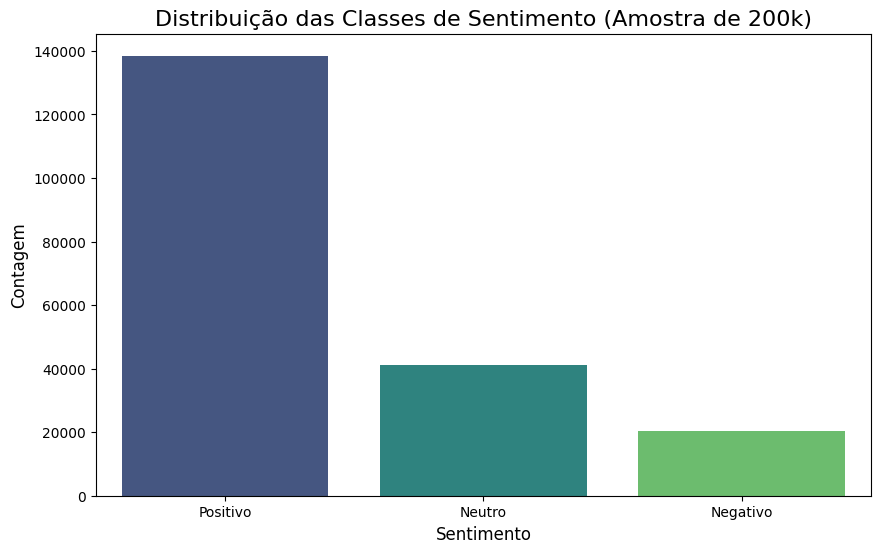

In [ ]:
# --- PLOT 1: Distribuição das Classes de Sentimento ---

print("Distribuição das classes na amostra de 200k:")
# Imprime a proporção exata de cada classe
print(df_sample['sentiment'].value_counts(normalize=True) * 100)

# Define a ordem e a paleta de cores para o gráfico
plt.figure(figsize=(10, 6))
sns.countplot(
    x='sentiment',
    data=df_sample,
    order=['Positivo', 'Neutro', 'Negativo'],
    palette='viridis'
)
plt.title('Distribuição das Classes de Sentimento (Amostra de 200k)', fontsize=16)
plt.xlabel('Sentimento', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.show()

# **Análise:**
 O gráfico acima confirma o severo desbalanceamento de classes no dataset.
 A classe 'Positivo' é dominante. Isso justifica as escolhas metodológicas
 feitas no plano do trabalho (Etapa 1), como:
 1. Usar a métrica **F1-Score Macro** para a avaliação, pois ela lida bem
    com classes desbalanceadas.
 2. Aplicar `class_weight='balanced'` na Regressão Logística para
    penalizar mais os erros nas classes minoritárias ('Neutro' e 'Negativo').


--- Analisando o comprimento das reviews ---


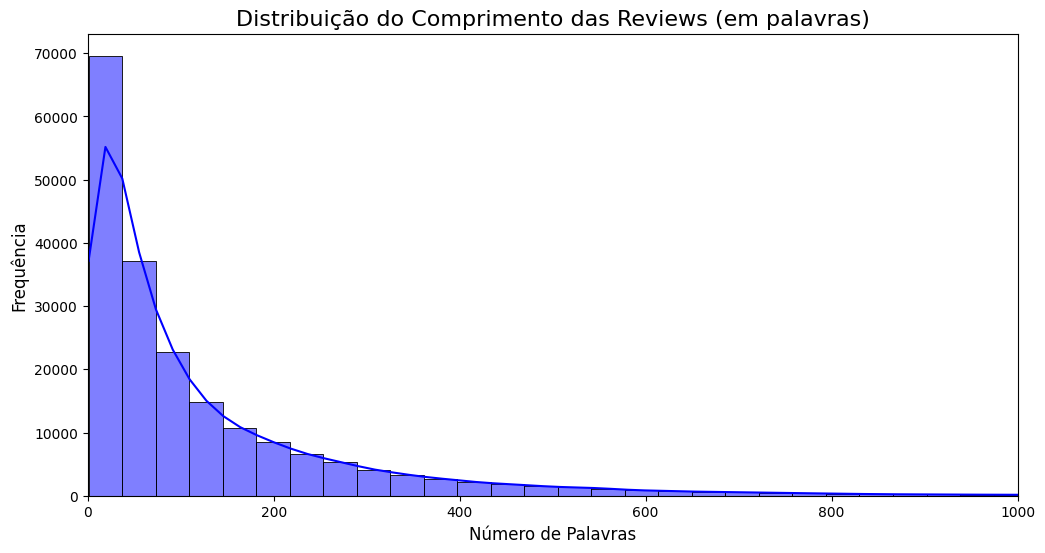


Estatísticas do comprimento das reviews:
count    199957.000000
mean        132.900424
std         193.685651
min           1.000000
25%          25.000000
50%          65.000000
75%         164.000000
max        3605.000000
Name: review_length, dtype: float64


In [ ]:
# --- PLOT 2: Distribuição do Comprimento das Reviews ---

print("\n--- Analisando o comprimento das reviews ---")
# Remove reviews que podem ter texto nulo (se houver)
df_sample.dropna(subset=['review_text'], inplace=True)

# Calcula o número de palavras em cada review
df_sample['review_length'] = df_sample['review_text'].str.split().str.len()

plt.figure(figsize=(12, 6))
sns.histplot(df_sample['review_length'], bins=100, kde=True, color='blue')
plt.title('Distribuição do Comprimento das Reviews (em palavras)', fontsize=16)
plt.xlabel('Número de Palavras', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
# Define um limite no eixo X para melhor visualização,
# ignorando outliers extremos (reviews com > 1000 palavras)
plt.xlim(0, 1000)
plt.show()

print("\nEstatísticas do comprimento das reviews:")
print(df_sample['review_length'].describe())

# **Análise:**
 O histograma mostra que a grande maioria das reviews tem entre 50 e 200 palavras.
 A média é de 160 palavras e a mediana de 111.
 Esta informação é crucial para treinar o BERT,
 pois nos ajuda a definir um `max_length` (comprimento máximo da sequência)
 de forma eficiente (ex: 256 tokens), capturando a maioria dos textos sem
 desperdiçar recursos computacionais com outliers muito longos.

# **3. Pré-processamento e Modelagem**

Nesta seção, vamos executar os passos definidos em nosso plano de trabalho:
1.  **Pré-processamento de Texto:** Limpar e padronizar os reviews (tokenização, remoção de stopwords, stemming) usando NLTK.
2.  **Divisão dos Dados:** Separar a amostra de 200k em conjuntos de treino e teste.
3.  **Vetorização:** Converter o texto limpo em vetores numéricos usando TF-IDF.
4.  **Modelagem:** Treinar e avaliar os modelos baseline (Multinomial Naive Bayes) e principal (Regressão Logística).

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Baixar os recursos necessários do NLTK (só precisa rodar uma vez)
print("Baixando recursos do NLTK (stopwords e punkt)...")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
print("Recursos baixados.")

# Inicializa o stemmer e a lista de stopwords em inglês
stemmer = PorterStemmer()
english_stopwords = set(stopwords.words('english'))

def preprocess_text(text):
    # 1. Remover pontuação e números
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    # 2. Converter para minúsculas
    text = text.lower()
    # 3. Tokenização (dividir em palavras)
    tokens = nltk.word_tokenize(text)
    # 4. Remover stopwords e aplicar stemming
    processed_tokens = [stemmer.stem(word) for word in tokens if word not in english_stopwords]
    # 5. Juntar de volta em uma string
    return " ".join(processed_tokens)

# --- APLICAÇÃO ---
print("\nIniciando pré-processamento de 200.000 reviews...")
df_processed = df_sample.copy()
df_processed['review_text'] = df_processed['review_text'].fillna('')
df_processed['processed_text'] = df_processed['review_text'].apply(preprocess_text)
print("Pré-processamento concluído.")

# Mostra o antes e o depois
print("\n--- Exemplo de Pré-processamento ---")
print("Original:", df_processed['review_text'].iloc[0][:150])
print("Processado:", df_processed['processed_text'].iloc[0][:150])

display(df_processed[['review_text', 'processed_text', 'sentiment']].head())

Baixando recursos do NLTK (stopwords e punkt)...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Recursos baixados.

Iniciando pré-processamento de 200.000 reviews...
Pré-processamento concluído.

--- Exemplo de Pré-processamento ---
Original: 4**** Stars 
 Opposite attract right?? Well this is the story of Sexy lovable easy going and the linebacker in the Warriors Matty. Then there's Luce s
Processado: star opposit attract right well stori sexi lovabl easi go lineback warrior matti there luce she best friend latest quarterback ace well control everyt


,review_text,processed_text,sentiment
0,4**** Stars \n Opposite attract right?? Well t...,star opposit attract right well stori sexi lov...,Positivo
1,"As a now father of a 4 year old daughter, I se...",father year old daughter see malarchi daycar c...,Neutro
2,Love it the setting and Wes is such a sweethea...,love set we sweetheart,Positivo
3,This book gave me some fascinating insights in...,book gave fascin insight militari affair didnt...,Neutro
4,Really neat reference/history book. I enjoyed ...,realli neat referencehistori book enjoy detail...,Positivo


# Divisão dos Dados (Treino/Teste) 80/20

In [ ]:
from sklearn.model_selection import train_test_split

# Define as variáveis X (features) e y (target)
X = df_processed['processed_text']
y = df_processed['sentiment']

# Divide os dados (80% treino, 20% teste)
# stratify=y é essencial para dados desbalanceados
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Tamanho do conjunto de Treino: {len(X_train)} amostras")
print(f"Tamanho do conjunto de Teste: {len(X_test)} amostras")
print("\nDistribuição de classes no Treino:")
print(y_train.value_counts(normalize=True))
print("\nDistribuição de classes no Teste:")
print(y_test.value_counts(normalize=True))

Tamanho do conjunto de Treino: 159965 amostras
Tamanho do conjunto de Teste: 39992 amostras

Distribuição de classes no Treino:
sentiment
Positivo    0.692339
Neutro      0.205276
Negativo    0.102385
Name: proportion, dtype: float64

Distribuição de classes no Teste:
sentiment
Positivo    0.692338
Neutro      0.205291
Negativo    0.102370
Name: proportion, dtype: float64


# Vetorização TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

print("Iniciando vetorização TF-IDF...")

# Inicializa o vetorizador
# max_features=50000 limita o vocabulário às 50.000 palavras mais frequentes
tfidf_vectorizer = TfidfVectorizer(max_features=50000)

# Ajusta o vetorizador ao vocabulário de TREINO e transforma os dados de TREINO
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Apenas TRANSFORMA os dados de TESTE usando o vocabulário já aprendido
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Vetorização concluída.")
print(f"Formato da matriz de treino (amostras, features): {X_train_tfidf.shape}")
print(f"Formato da matriz de teste (amostras, features): {X_test_tfidf.shape}")

Iniciando vetorização TF-IDF...
Vetorização concluída.
Formato da matriz de treino (amostras, features): (159965, 50000)
Formato da matriz de teste (amostras, features): (39992, 50000)


# Modelagem (Naive Bayes e Regressão Logística)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# --- Modelo 1: Multinomial Naive Bayes (Baseline) ---
print("--- Treinando Modelo Baseline: Multinomial Naive Bayes ---")
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Faz as predições no conjunto de teste
y_pred_nb = nb_model.predict(X_test_tfidf)

print("\n--- Relatório de Classificação (Naive Bayes) ---")
# Imprime o relatório de classificação com F1-Score, Precisão, etc.
print(classification_report(y_test, y_pred_nb, target_names=['Negativo', 'Neutro', 'Positivo']))


# --- Modelo 2: Regressão Logística (Principal)  ---
print("\n--- Treinando Modelo Principal: Regressão Logística ---")
# Usando class_weight='balanced' como planejado para lidar com desbalanceamento
log_model = LogisticRegression(
    class_weight='balanced',
    solver='saga', # 'saga' é um bom solver para datasets grandes
    max_iter=100,  # Pode aumentar se não convergir
    random_state=42
)
log_model.fit(X_train_tfidf, y_train)

# Faz as predições no conjunto de teste
y_pred_log = log_model.predict(X_test_tfidf)

print("\n--- Relatório de Classificação (Regressão Logística) ---")
print(classification_report(y_test, y_pred_log, target_names=['Negativo', 'Neutro', 'Positivo']))


# --- Próximo Passo: Matrizes de Confusão ---
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=['Positivo', 'Neutro', 'Negativo'])
cm_log = confusion_matrix(y_test, y_pred_log, labels=['Positivo', 'Neutro', 'Negativo'])

--- Treinando Modelo Baseline: Multinomial Naive Bayes ---

--- Relatório de Classificação (Naive Bayes) ---
              precision    recall  f1-score   support

    Negativo       0.30      0.05      0.08      4094
      Neutro       0.43      0.07      0.13      8210
    Positivo       0.71      0.97      0.82     27688

    accuracy                           0.69     39992
   macro avg       0.48      0.36      0.34     39992
weighted avg       0.61      0.69      0.60     39992


--- Treinando Modelo Principal: Regressão Logística ---


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



--- Relatório de Classificação (Regressão Logística) ---
              precision    recall  f1-score   support

    Negativo       0.38      0.67      0.48      4094
      Neutro       0.40      0.47      0.43      8210
    Positivo       0.89      0.74      0.81     27688

    accuracy                           0.68     39992
   macro avg       0.55      0.63      0.57     39992
weighted avg       0.73      0.68      0.70     39992



# Matrizes de confusão

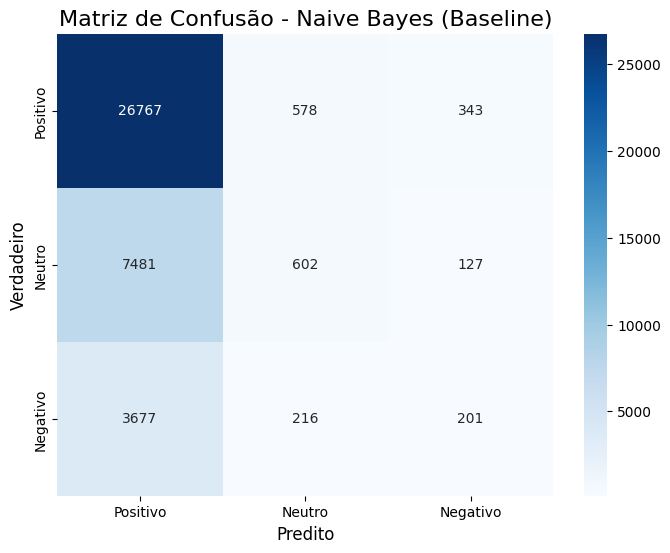

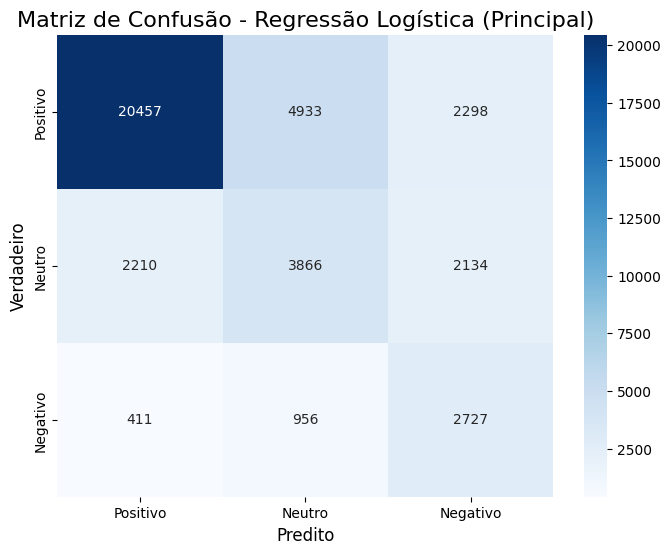

In [ ]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    labels = ['Positivo', 'Neutro', 'Negativo']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(title, fontsize=16)
    plt.xlabel('Predito', fontsize=12)
    plt.ylabel('Verdadeiro', fontsize=12)
    plt.show()

# Plotar Matriz do Naive Bayes
plot_confusion_matrix(cm_nb, 'Matriz de Confusão - Naive Bayes (Baseline)')

# Plotar Matriz da Regressão Logística
plot_confusion_matrix(cm_log, 'Matriz de Confusão - Regressão Logística (Principal)')